# Loading The Dataset

- Yale faces database: http://vision.ucsd.edu/content/yale-face-database

In [2]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import zipfile

path = "/content/drive/MyDrive/OpenCV/Datasets/yalefaces.zip"
zip_object = zipfile.ZipFile(file = path , mode = "r")
zip_object.extractall("./")
zip_object.close()

# Pre-Processing The Images

In [4]:
import os

print(os.listdir("/content/yalefaces/train"))

['subject14.happy.gif', 'subject12.glasses.gif', 'subject01.noglasses.gif', 'subject10.rightlight.gif', 'subject02.happy.gif', 'subject07.noglasses.gif', 'subject08.glasses.gif', 'subject10.wink.gif', 'subject08.centerlight.gif', 'subject02.glasses.gif', 'subject09.leftlight.gif', 'subject09.sleepy.gif', 'subject10.glasses.gif', 'subject07.sleepy.gif', 'subject03.noglasses.gif', 'subject04.centerlight.gif', 'subject01.normal.gif', 'subject06.sleepy.gif', 'subject08.sleepy.gif', 'subject08.surprised.gif', 'subject09.happy.gif', 'subject15.glasses.gif', 'subject02.noglasses.gif', 'subject11.centerlight.gif', 'subject01.sad.gif', 'subject12.surprised.gif', 'subject14.noglasses.gif', 'subject13.surprised.gif', 'subject08.happy.gif', 'subject15.noglasses.gif', 'subject09.glasses.gif', 'subject13.noglasses.gif', 'subject02.surprised.gif', 'subject04.rightlight.gif', 'subject12.sad.gif', 'subject05.happy.gif', 'subject15.wink.gif', 'subject07.wink.gif', 'subject08.sad.gif', 'subject03.normal.

In [41]:
def get_image_data():

    paths = [os.path.join("/content/yalefaces/train", f) for f in os.listdir("/content/yalefaces/train")]
    #print(paths)
    faces = []
    ids = []
    for path in paths:
        #print(path)
        # convert("L") -- > Gray
        image = Image.open(path).convert("L")
        #print(type(image))
        image_np = np.array(image, "uint8")
        #print(type(image_np))
        id = int(os.path.split(path)[1].split(".")[0].replace("subject",""))
        #print(id)
        ids.append(id)
        faces.append(image_np)

    return np.array(ids),faces

In [42]:
ids , faces = get_image_data()

In [44]:
ids.shape,np.array(faces).shape

((135,), (135, 243, 320))

In [45]:
243 * 320

77760

# Traning The LBPH Classifier ( Local Binary Patterns Histogram ) 

In [48]:
# Default Değerler !!!

# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8

lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write("lbph_classifier.yml")

In [49]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read("/content/lbph_classifier.yml")

# Test Images

In [57]:
test_image_path = "/content/yalefaces/test/subject10.sad.gif"
image = Image.open(test_image_path).convert("L")
image_np = np.array(image)
image_np.shape

(243, 320)

In [51]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 6.384336446373091)

In [52]:
print("Results : {}".format(prediction[0]))
print("Confidence : {}".format(prediction[1]))

Results : 10
Confidence : 6.384336446373091


In [54]:
expected_output = int(os.path.split(test_image_path)[1].split(".")[0].replace("subject",""))
print("Expected Output : {}".format(expected_output))

Expected Output : 10


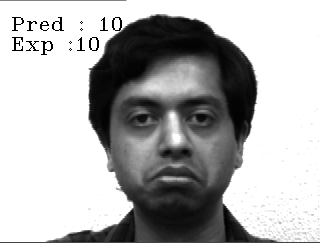

In [58]:
cv2.putText(image_np,"Pred : " + str(prediction[0]), (10, 30) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(image_np,"Exp :" + str(expected_output), (10, 50) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(image_np)

# All Of The Test Images

In [62]:
test_paths = [os.path.join("/content/yalefaces/test", f ) for f in os.listdir("/content/yalefaces/test")]
predictions = []
expected_outputs = []

for path in test_paths:

    image = Image.open(path).convert("L")
    image_np = np.array(image)

    prediction,_ = lbph_face_classifier.predict(image_np)
    expected_output = int(os.path.split(path)[1].split(".")[0].replace("subject",""))
    
    expected_outputs.append(expected_output)
    predictions.append(prediction)

In [63]:
print(expected_outputs)
print(predictions)

[12, 11, 2, 7, 11, 10, 13, 10, 13, 14, 9, 8, 6, 1, 6, 7, 15, 8, 9, 4, 15, 3, 5, 12, 3, 1, 14, 2, 4, 5]
[12, 11, 5, 9, 11, 10, 13, 4, 13, 14, 7, 8, 6, 1, 14, 7, 7, 4, 9, 4, 15, 9, 5, 12, 3, 1, 14, 4, 9, 5]


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
accuracy_score(expected_outputs, predictions)

0.6666666666666666

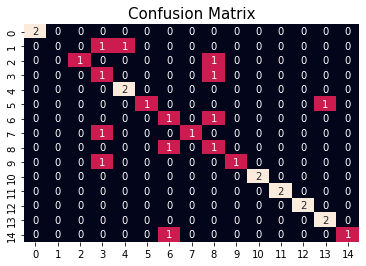

In [68]:
cm = confusion_matrix(expected_outputs, predictions)
sns.heatmap(cm, annot = True, fmt = "d", cbar = False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

# LBPH Custom Parameters

In [70]:
lbph_classifier_custom = cv2.face.LBPHFaceRecognizer_create(radius =2 , neighbors = 5, grid_x = 5 , grid_y = 5)
lbph_classifier_custom.train(faces, ids)
lbph_classifier_custom.write("lbph_classifier_custom.yml")

In [71]:
lbph_classifier_custom = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier_custom.read("lbph_classifier_custom.yml")

In [73]:
test_paths = [os.path.join("/content/yalefaces/test", f) for f in os.listdir("/content/yalefaces/test")]
predictions = []
expected_outputs = []

for path in test_paths:

    image = Image.open(path).convert("L")
    image_np = np.array(image)

    prediction , _ = lbph_classifier_custom.predict(image_np)
    expected_output = int(os.path.split(path)[1].split(".")[0].replace("subject",""))

    predictions.append(prediction)
    expected_outputs.append(expected_output)

In [74]:
# Öncesi 0.6666 idi
accuracy_score(expected_outputs, predictions)

0.6

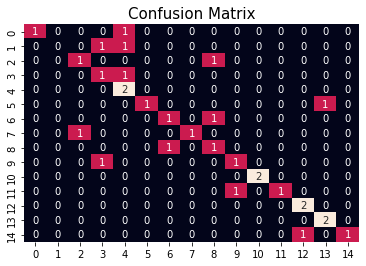

In [75]:
cm = confusion_matrix(expected_outputs, predictions)
sns.heatmap(cm, annot = True, fmt = "d", cbar = False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

# Dlib

In [76]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

In [77]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("/content/drive/MyDrive/OpenCV/Weights/shape_predictor_68_face_landmarks.dat")

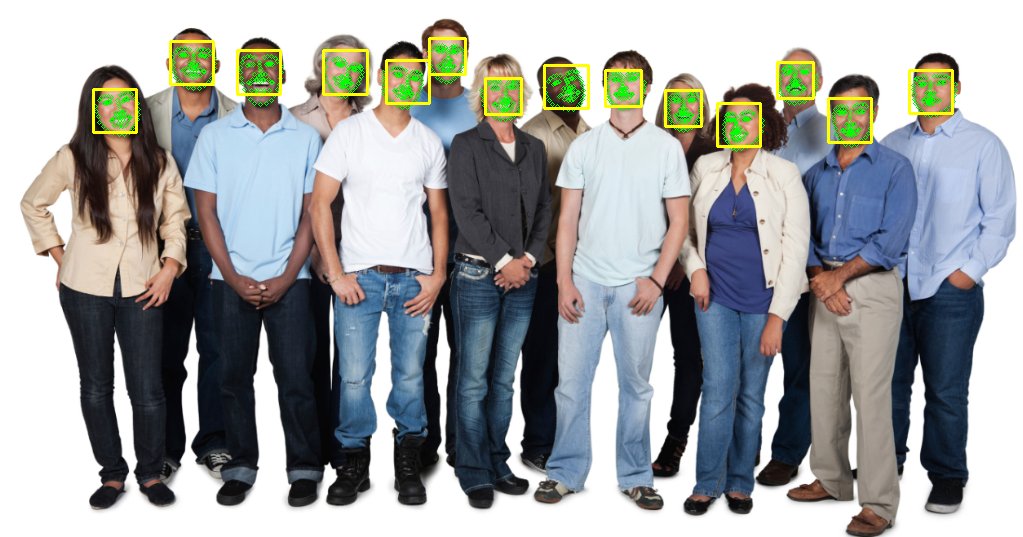

In [83]:
image = "/content/drive/MyDrive/OpenCV/Images/people2.jpg"
img = cv2.imread(image)
face_detection = face_detector(img, 1)

for face in face_detection:
    
    points = points_detector(img,face)

    #print(points.parts())   
    #print(len(points.parts()))

    for point in points.parts():
        cv2.circle(img, (point.x, point.y), 2, (0,255,0), 1)


    #print(face)

    l,t,r,b = face.left(), face.top(), face.right(),face.bottom()
    cv2.rectangle(img, (l,t), (r,b), (0,255,255),2)

cv2_imshow(img)


# Detecting Facial Descriptors

In [14]:
import os 
import numpy as np
import cv2
from PIL import Image
import dlib
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import zipfile

zip_object = zipfile.ZipFile(file = "/content/drive/MyDrive/OpenCV/Datasets/yalefaces.zip", mode = "r")
zip_object.extractall("./")
zip_object.close()

In [78]:
# Bir önceki derste kullanılan fonksiyonlar

print("""

Yüz Algılama için !!!

Haarcascade --->

face_detector = cv2.CascadeClassifier("/content/drive/MyDrive/OpenCV/Cascades/haarcascade_frontalface_default.xml")
detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.001, minNeighbors = 5, minSize =(5,5)) 

Cnn --->

face_detector_cnn = dlib.cnn_face_detection_model_v1("/content/drive/MyDrive/OpenCV/Weights/mmod_human_face_detector.dat")
detections = face_detector_cnn(image, 1)

Hog --->

face_detector_hog = dlib.get_frontal_face_detector()
detections = face_detector_hog(image, 1)

##### Hangi yüz kime ait Tahmin için !!!

LBPH --->

lbph_classifier_custom = cv2.face.LBPHFaceRecognizer_create(radius =2 , neighbors = 5, grid_x = 5 , grid_y = 5)
lbph_classifier_custom.train(faces, ids)
lbph_classifier_custom.write("lbph_classifier_custom.yml")

""")



Yüz Algılama için !!!

Haarcascade --->

face_detector = cv2.CascadeClassifier("/content/drive/MyDrive/OpenCV/Cascades/haarcascade_frontalface_default.xml")
detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.001, minNeighbors = 5, minSize =(5,5)) 

Cnn --->

face_detector_cnn = dlib.cnn_face_detection_model_v1("/content/drive/MyDrive/OpenCV/Weights/mmod_human_face_detector.dat")
detections = face_detector_cnn(image, 1)

Hog --->

face_detector_hog = dlib.get_frontal_face_detector()
detections = face_detector_hog(image, 1)

##### Hangi yüz kime ait Tahmin için !!!

LBPH --->

lbph_classifier_custom = cv2.face.LBPHFaceRecognizer_create(radius =2 , neighbors = 5, grid_x = 5 , grid_y = 5)
lbph_classifier_custom.train(faces, ids)
lbph_classifier_custom.write("lbph_classifier_custom.yml")




In [28]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("/content/drive/MyDrive/OpenCV/Weights/shape_predictor_68_face_landmarks.dat")
face_descriptor_extractor = dlib.face_recognition_model_v1("/content/drive/MyDrive/OpenCV/Weights/dlib_face_recognition_resnet_model_v1.dat")

In [40]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join("/content/yalefaces/train", f) for f in os.listdir("/content/yalefaces/train")]

for path in paths:

    # RBG !!!!
    image = Image.open(path).convert("RGB")
    image_np = np.array(image, "uint8")

    # print(type(image_np))
    # print(image_np.shape)

    face_detection = face_detector(image_np, 1)
    for face in face_detection:
        l,t,r,b = face.left(),face.top(), face.right(), face.bottom()
        cv2.rectangle(image_np, (l,t), (r,b), (0,0,255), 2)

        points = points_detector(image_np, face)
        for point in points.parts():
            cv2.circle(image_np, (point.x, point.y), 2, (0,255,0), 1)

        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)

        # print(type(face_descriptor)) -- > Vector
        # print(len(face_descriptor)) # 128 
        # print(face_descriptor)

        face_descriptor = [f for f in face_descriptor]
        # print(face_descriptor)
        face_descriptor = np.asarray(face_descriptor, dtype = np.float64)
        #print(face_descriptor)
        face_descriptor = face_descriptor[np.newaxis , : ]
        # print(face_descriptor.shape)
        # print(face_descriptor)

        if face_descriptors is None:
            face_descriptors = face_descriptor

        else:
            face_descriptors = np.concatenate((face_descriptors,face_descriptor ), axis = 0)


        index[idx] = path
        idx +=1

#    cv2_imshow(image_np)

In [41]:
face_descriptors.shape

(132, 128)

In [42]:
len(index)

132

In [46]:
index[0]

'/content/yalefaces/train/subject14.happy.gif'

# Calculatin The Distance Between Faces

In [47]:
# Lower Distance == Hight Similarty

In [49]:
np.linalg.norm(face_descriptors[131]- face_descriptors[131]),np.linalg.norm(face_descriptors[131]- face_descriptors[130])

(0.0, 0.44056599866275903)

In [50]:
np.linalg.norm(face_descriptors[131]- face_descriptors[129])

0.8395506912825188

In [51]:
np.linalg.norm(face_descriptors[0] - face_descriptors , axis = 1)

array([0.        , 0.86256742, 0.8119508 , 0.74502766, 0.75759967,
       0.6427786 , 0.56494547, 0.73267048, 0.553263  , 0.71000544,
       0.73537711, 0.67297666, 0.70016945, 0.61636421, 0.69360436,
       0.55853601, 0.77596852, 0.48968419, 0.55738618, 0.60730571,
       0.67046865, 0.68002772, 0.72922264, 0.67285534, 0.79284755,
       0.85784391, 0.21440535, 0.6126692 , 0.5687734 , 0.62091927,
       0.72541942, 0.70921899, 0.77294733, 0.52861208, 0.8833527 ,
       0.7386141 , 0.65386009, 0.63038829, 0.56245317, 0.69360436,
       0.59957999, 0.56401983, 0.70215369, 0.72011387, 0.48688063,
       0.78878906, 0.62251312, 0.64689458, 0.64309608, 0.6427786 ,
       0.7454968 , 0.62331394, 0.77165836, 0.70077309, 0.65546221,
       0.69240022, 0.70678986, 0.61785965, 0.53387749, 0.60040883,
       0.48852279, 0.83799656, 0.85630812, 0.46161175, 0.59960552,
       0.28542255, 0.64359505, 0.82263695, 0.45041805, 0.70693422,
       0.67571076, 0.70019618, 0.54736043, 0.7046421 , 0.77537

In [52]:
# Kendisi önemli değil !!
np.linalg.norm(face_descriptors[0] - face_descriptors[1:] , axis = 1)

array([0.86256742, 0.8119508 , 0.74502766, 0.75759967, 0.6427786 ,
       0.56494547, 0.73267048, 0.553263  , 0.71000544, 0.73537711,
       0.67297666, 0.70016945, 0.61636421, 0.69360436, 0.55853601,
       0.77596852, 0.48968419, 0.55738618, 0.60730571, 0.67046865,
       0.68002772, 0.72922264, 0.67285534, 0.79284755, 0.85784391,
       0.21440535, 0.6126692 , 0.5687734 , 0.62091927, 0.72541942,
       0.70921899, 0.77294733, 0.52861208, 0.8833527 , 0.7386141 ,
       0.65386009, 0.63038829, 0.56245317, 0.69360436, 0.59957999,
       0.56401983, 0.70215369, 0.72011387, 0.48688063, 0.78878906,
       0.62251312, 0.64689458, 0.64309608, 0.6427786 , 0.7454968 ,
       0.62331394, 0.77165836, 0.70077309, 0.65546221, 0.69240022,
       0.70678986, 0.61785965, 0.53387749, 0.60040883, 0.48852279,
       0.83799656, 0.85630812, 0.46161175, 0.59960552, 0.28542255,
       0.64359505, 0.82263695, 0.45041805, 0.70693422, 0.67571076,
       0.70019618, 0.54736043, 0.7046421 , 0.77537957, 0.60398

In [53]:
# Kendisi önemli değil !!
np.linalg.norm(face_descriptors[0] - face_descriptors[1:] , axis = 1)[91]

0.6796423769455717

# Detecting Faces With Dlib

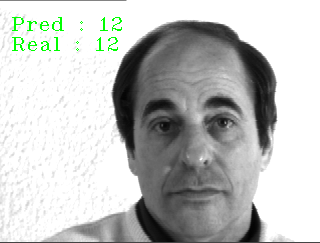

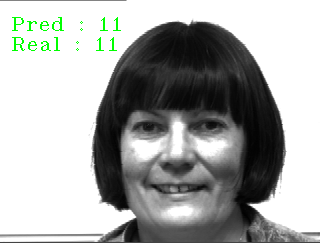

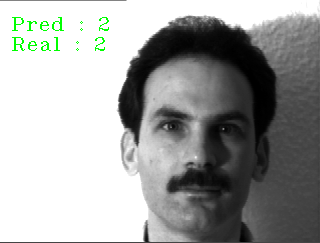

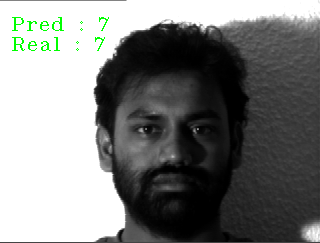

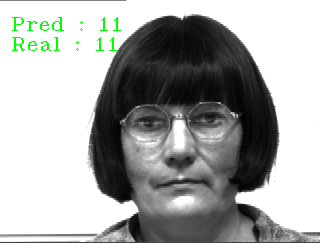

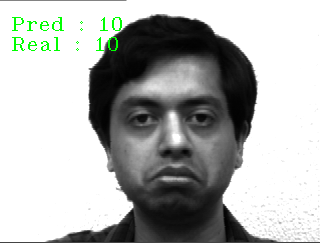

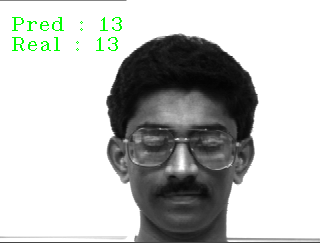

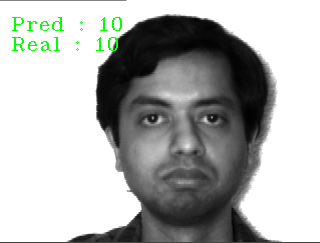

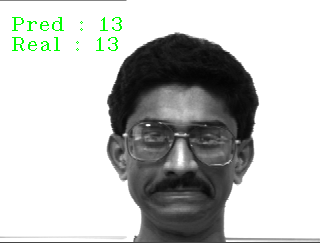

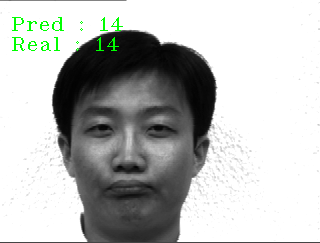

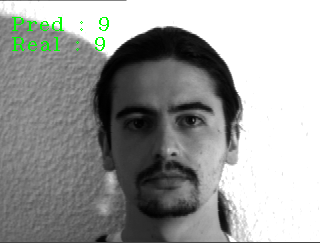

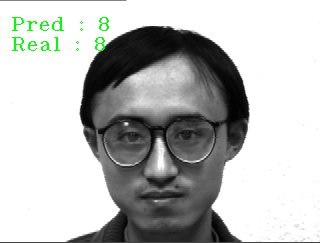

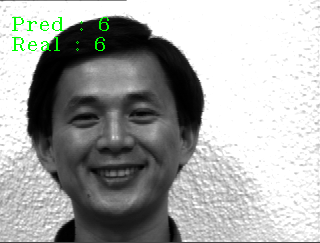

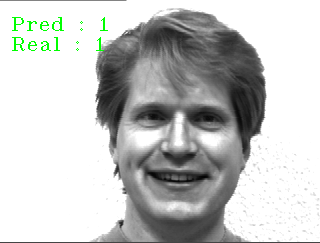

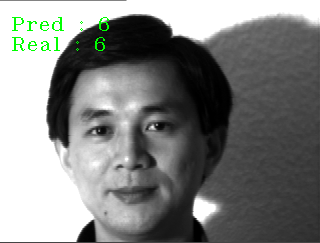

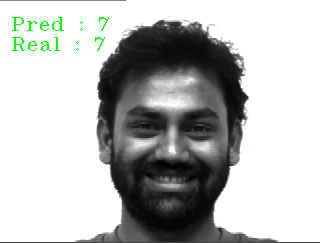

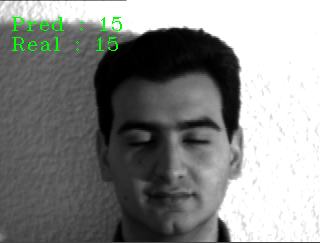

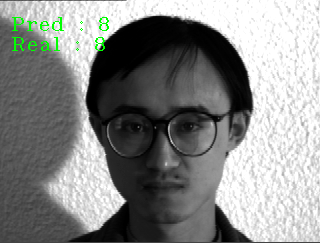

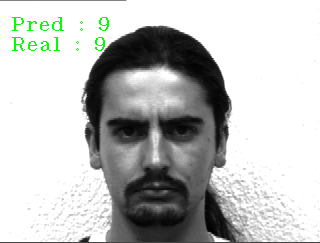

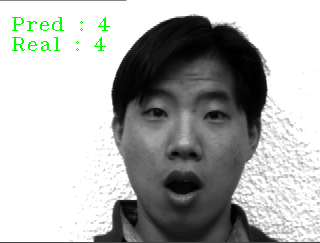

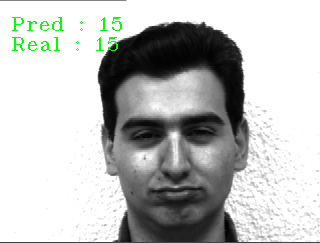

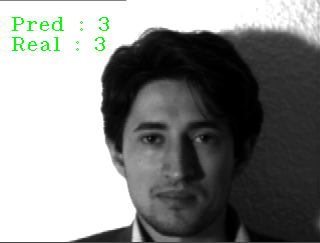

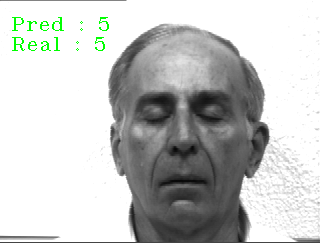

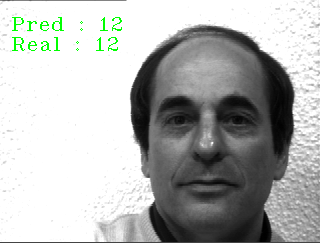

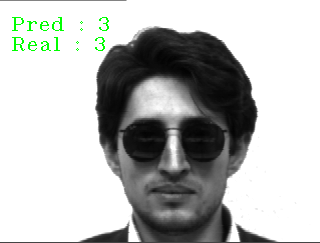

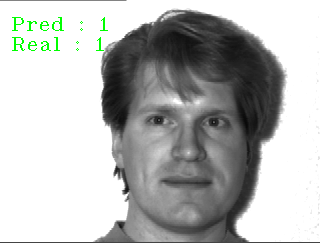

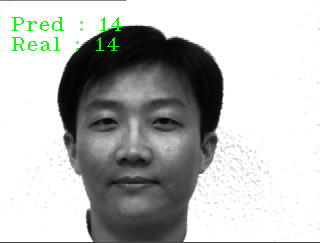

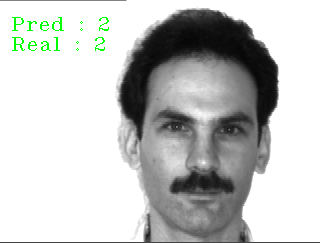

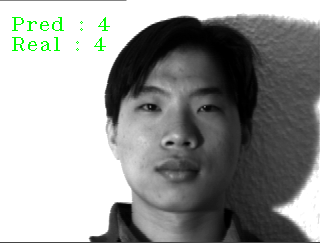

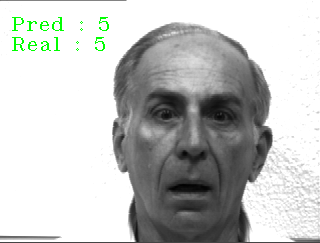

In [64]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("/content/drive/MyDrive/OpenCV/Weights/shape_predictor_68_face_landmarks.dat")
face_descriptor_extractor = dlib.face_recognition_model_v1("/content/drive/MyDrive/OpenCV/Weights/dlib_face_recognition_resnet_model_v1.dat")

index = {}
idx = 0
face_descriptors = None

train_paths = [os.path.join("/content/yalefaces/train", f ) for f in os.listdir("/content/yalefaces/train")]

for path in train_paths:

    image = Image.open(path).convert("RGB")
    image_np = np.array(image)

    face_detection = face_detector(image_np, 1)
    for face in face_detection:
        
        l,t,r,b = face.left(), face.top(), face.right(), face.bottom()
        cv2.rectangle(image_np, (l,t) , (r,b), (255,0,0),2)

        points = points_detector(image_np, face)
        
        for point in points.parts():

            cv2.circle(image_np, (point.x, point.y),2, (0,0,255), 1)

        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np,points)
        face_descriptor = [f for f in face_descriptor]
        face_descriptor = np.asarray(face_descriptor, dtype = np.float64)
        face_descriptor = face_descriptor[np.newaxis , : ]

        if face_descriptors is None:
            face_descriptors = face_descriptor

        else:
            face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)

        index[idx] = path 
        idx+=1

    #cv2_imshow(image_np)

########

threshold = 0.5
predictions = []
expected_outputs = []

test_paths = [os.path.join("/content/yalefaces/test", f ) for f in os.listdir("/content/yalefaces/test")]

for path in test_paths:
    image = Image.open(path).convert("RGB")
    image_np = np.array(image, "uint8")
    face_detection = face_detector(image_np, 1)
    for face in face_detection:

        points = points_detector(image_np, face)
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
        face_descriptor = [f for f in face_descriptor]
        face_descriptor = np.asarray(face_descriptor, np.float64)
        face_descriptor = face_descriptor[np.newaxis , :]

        # Train Değerlerden Bulduğum Face_Descriptors

        distances = np.linalg.norm(face_descriptor - face_descriptors ,axis = 1)
        min_index = np.argmin(distances)
        min_distance = distances[min_index]

        # !!!! Dikkat index[min_index] path yolunu çağırdık 
        # Index Trainden Gelme !!!
        # Kırım Noktası 
        
        if min_distance < threshold:
            name_pred = int(os.path.split(index[min_index])[1].split(".")[0].replace("subject",""))

        else:
            name_pred = "Not Identified"


        # Test Yolundaki path !!!

        name_real = int(os.path.split(path)[1].split(".")[0].replace("subject",""))

        font = cv2.FONT_HERSHEY_COMPLEX_SMALL
        cv2.putText(image_np, "Pred : " + str(name_pred), (10,30), font, 1, (0,255,0))
        cv2.putText(image_np, "Real : " + str(name_real), (10,50), font, 1, (0,255,0))

        expected_outputs.append(name_real)
        predictions.append(name_pred)

        cv2_imshow(image_np)

In [60]:
face_descriptors.shape, len(index)

((132, 128), 132)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [66]:
accuracy_score(expected_outputs, predictions)

1.0

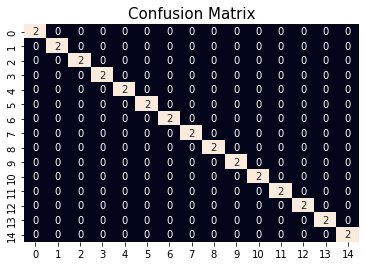

In [67]:
cm = confusion_matrix(expected_outputs, predictions)
sns.heatmap(cm, annot = True, fmt = "d", cbar = False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

# HomeWork

In [68]:
import cv2
import dlib
import numpy as np
from PIL import Image
from google.colab import drive
from google.colab.patches import cv2_imshow
import os

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import zipfile

path = "/content/drive/MyDrive/OpenCV/Datasets/jones_gabriel.zip"
zipfile_object = zipfile.ZipFile(file = path, mode = "r")
zipfile_object.extractall("./")
zipfile_object.close()

In [70]:
print(os.listdir("/content/jones_gabriel"))

['person.1.12.jpg', 'person.1.24.jpg', 'person.2.17.jpg', 'person.1.20.jpg', 'person.2.16.jpg', 'person.2.8.jpg', 'person.1.25.jpg', 'person.2.21.jpg', 'person.1.8.jpg', 'person.2.9.jpg', 'person.2.14.jpg', 'person.2.4.jpg', 'person.2.7.jpg', 'person.1.23.jpg', 'person.1.7.jpg', 'person.1.14.jpg', 'person.1.3.jpg', 'person.1.6.jpg', 'person.1.17.jpg', 'person.1.2.jpg', 'person.2.3.jpg', 'person.2.1.jpg', 'person.2.11.jpg', 'person.2.13.jpg', 'person.2.10.jpg', 'person.1.15.jpg', 'person.1.11.jpg', 'person.1.4.jpg', 'person.2.15.jpg', 'person.1.1.jpg', 'person.1.22.jpg', 'person.1.13.jpg', 'person.2.20.jpg', 'person.2.6.jpg', 'person.2.23.jpg', 'person.1.9.jpg', 'person.1.5.jpg', 'person.1.10.jpg', 'person.2.25.jpg', 'person.2.2.jpg', 'person.1.16.jpg', 'person.2.18.jpg', 'person.2.24.jpg', 'person.1.19.jpg', 'person.2.22.jpg', 'person.2.12.jpg', 'person.1.21.jpg', 'person.1.18.jpg', 'person.2.5.jpg', 'person.2.19.jpg']


In [71]:
def get_image_data():

    paths = [os.path.join("/content/jones_gabriel" , f) for f in os.listdir("/content/jones_gabriel")]

    faces = []
    ids = []

    for path in paths:

        image = Image.open(path).convert("L")
        image_np = np.array(image, np.uint8)
        id = int(path.split(".")[1])

        ids.append(id)
        faces.append(image_np)

    return np.array(ids) , faces

In [72]:
ids, faces = get_image_data()

In [73]:
ids.shape, np.array(faces).shape

((50,), (50, 220, 220))

In [74]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write("home_lbph_classifier.yml")

In [75]:
face_lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
face_lbph_classifier.read("home_lbph_classifier.yml")

In [76]:
image = Image.open("/content/jones_gabriel/person.1.1.jpg")
image.size

(220, 220)

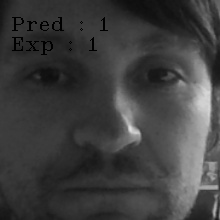

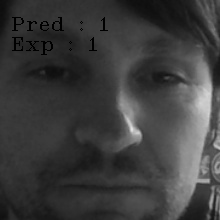

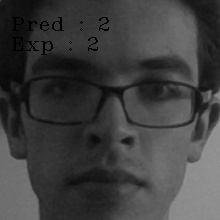

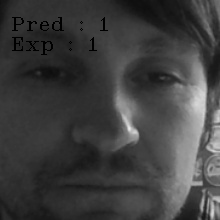

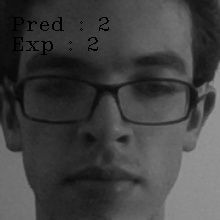

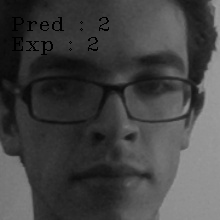

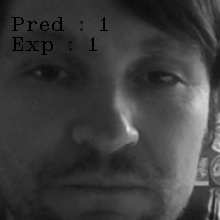

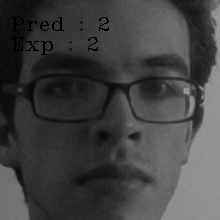

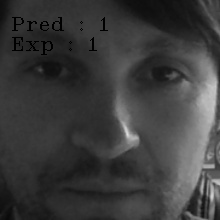

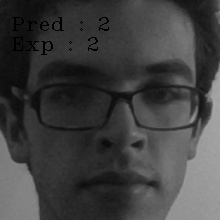

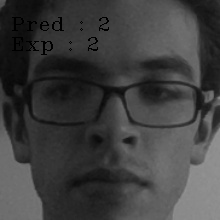

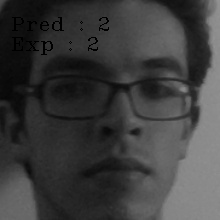

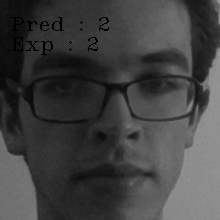

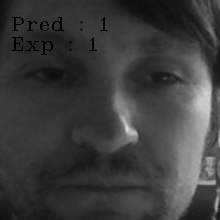

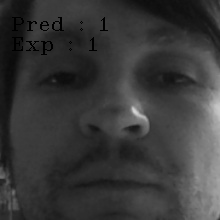

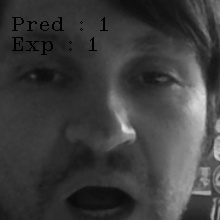

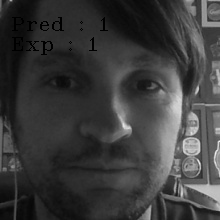

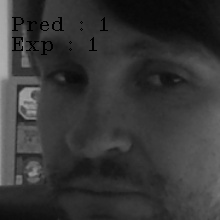

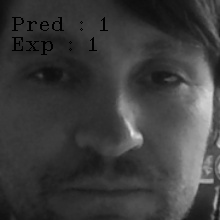

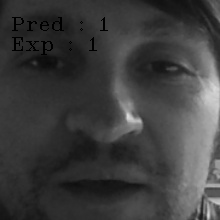

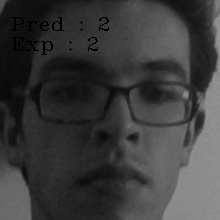

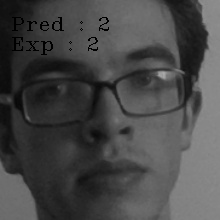

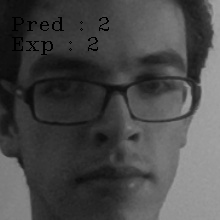

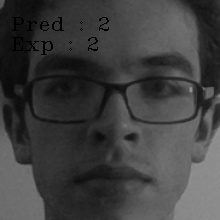

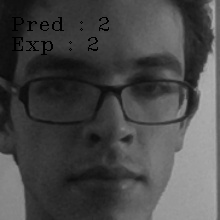

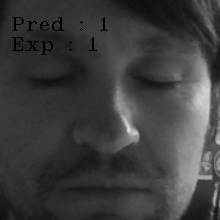

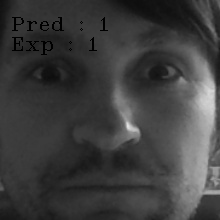

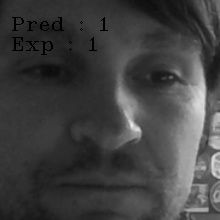

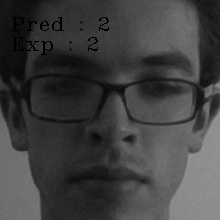

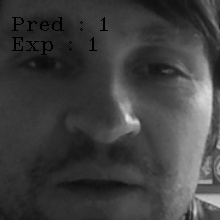

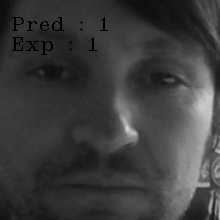

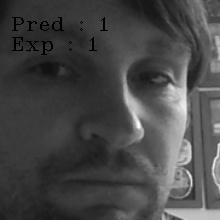

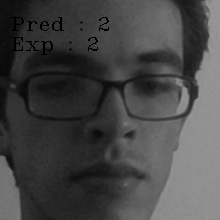

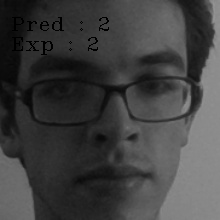

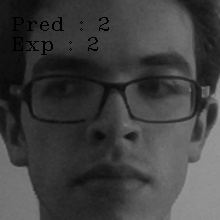

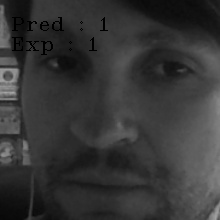

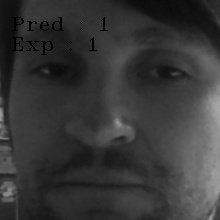

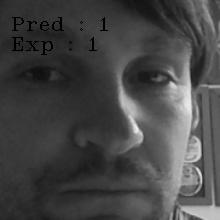

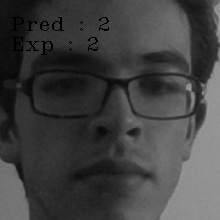

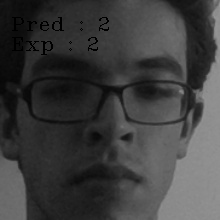

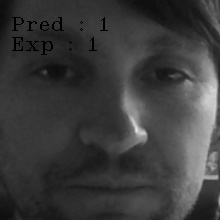

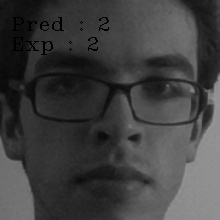

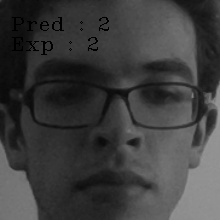

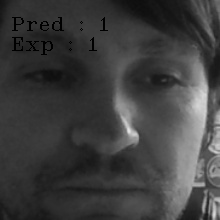

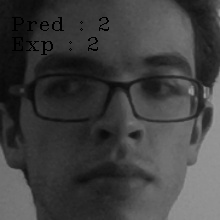

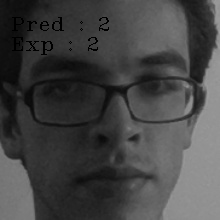

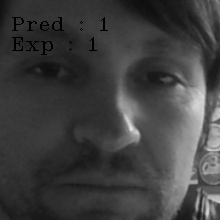

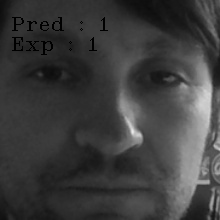

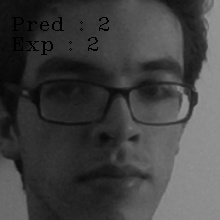

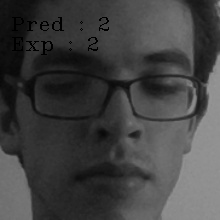

In [77]:
paths = [os.path.join("/content/jones_gabriel",f) for f in os.listdir("/content/jones_gabriel")]

for path in paths :
    image= Image.open(path).convert("L")
    image_np = np.array(image, np.uint8)

    prediction, _ = face_lbph_classifier.predict(image_np)
    expected_output = int(path.split(".")[1])

    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    cv2.putText(image_np, "Pred : " + str(prediction), ( 10,30 ),font, 1, (0,255,0))
    cv2.putText(image_np, "Exp : " + str(expected_output), ( 10,50 ),font, 1, (0,255,0))

    cv2_imshow(image_np)